# Chapter 2 - Interactive

### This notebook will contain code blocks, images, and gifs to further enhance your understanding and intuition of specific topics listed below:

- #### tokenization + dataloading
- #### absolute positional embeddings

## Tokenization:

#### Lets go through the entire process of tokenizing a piece of text and creating batches of data that you can feed into your GPT2 model.

#### First demonstrate what it means to turn words in a text into tokens.

#### Every word or special character has a number that corresponds to it,  as you can see below, and when you tokenize a text, all you are doing is replacing a word or special character with the corresponding number.

<div style="max-width:800px">
    
![](images/interactive_1.gif)

</div>

#### Create a sentence using only the words below, no punctuation. Include one word that is not explicity in the vocabulary.

In [7]:
vocabulary = {
    "hello": 1,
    "world": 2,
    "i": 3,
    "am": 4,
    "learning": 5,
    "tokenization": 6,
    "this": 7,
    "is": 8,
    "fun": 9,
    "<|UNK|>": 10,
}

In [14]:
YOUR_SENTENCE = "tokenization is so fun"

YOUR_TEXT = YOUR_SENTENCE.split(" ")
print(YOUR_TEXT)

['tokenization', 'is', 'so', 'fun']


#### Lets tokenize this text

In [9]:
YOUR_TEXT_TOKENIZED = []

for word in YOUR_TEXT:
    if word in vocabulary:
        YOUR_TEXT_TOKENIZED.append(vocabulary[word]) # If the word is in the vocab replace it with the corresponding number
    else:
        YOUR_TEXT_TOKENIZED.append(vocabulary["<|UNK|>"]) # If the word is not in the vocabulary replace it with 10 (corresponding number for unknown word)

print(YOUR_TEXT_TOKENIZED)

[6, 8, 10, 9]


#### Lets see how the words and numbers relate:

In [10]:
for index, token_id in enumerate(YOUR_TEXT_TOKENIZED):
    print(f"Word {index+1} is {YOUR_TEXT[index]}\nIn the vocabulary {YOUR_TEXT[index]} correlates to the number {token_id}\nSo, in the tokenized text it is {token_id}\n")

Word 1 is tokenization
In the vocabulary tokenization correlates to the number 6
So, in the tokenized text it is 6

Word 2 is is
In the vocabulary is correlates to the number 8
So, in the tokenized text it is 8

Word 3 is so
In the vocabulary so correlates to the number 10
So, in the tokenized text it is 10

Word 4 is fun
In the vocabulary fun correlates to the number 9
So, in the tokenized text it is 9



## Dataloading:

#### Remember, LLMs are pretrained by trying to predict the next word in a sequence of words.

<div style="max-width:800px">
    
![](images/interactive_2.gif)

</div>

#### Lets implement this in code. First, lets see your sentence and the tokenized version.

In [19]:
print(YOUR_TEXT)
print("\n",YOUR_TEXT_TOKENIZED)

['tokenization', 'is', 'so', 'fun']

 [6, 8, 10, 9]


#### Next lets create the input and target pairs. We want the first element in the inputs array and target array to correspond to eachother. Meaning, the first element in the targets array is the word we want the LLM to predict is next when fed the first word in the sequenec. The second element in the targets array should be the word the LLM predicts when fed the second word in the sequence, and so on.

In [22]:
inputs = []
targets = []

for i in range(len(YOUR_TEXT) - 1):
    inputs.append(YOUR_TEXT[i])
    targets.append(YOUR_TEXT[i+1])

#### Lets analyze what this code does. We have our forloop which will iterate through every word in the sequence, but we have the loop end before we get to the last word in the sequence. Why? 

#### Because, the LLM is supposed to predict the next word in the sequence, given a word. If we give it the last word in the sequence, there is nothing left to predict. Therefore, we stop once we get to the second to last word.

#### Lets see what is in our inputs and targets arrays:

In [24]:
print("Input words:", inputs)
print("Target words:", targets)

Input words: ['tokenization', 'is', 'so']
Target words: ['is', 'so', 'fun']


#### As you can see, its just like how I described above. 

#### The first element in inputs is the first word in the sequence. The first element in targets is the second word in the sequence.
#### The second element in inputs is the second word in the sequence. The second element in targets is the third word in the sequence.
#### .
#### .
#### .
#### The last element in inputs is the second to last word in the sequence. The last element in targets is the last word in the sequence.

## Absolute Positional Embeddings

#### Positional embeddings are added to the word embeddings for each token resulting in the final embeddings.

<div style="max-width:800px">
    
![](images/interactive_3.gif)

</div>

#### Transformers, unlike RNNs or CNNs, do not inherently understand the order of tokens in a sequence. This means that if you give a Transformer the sentence “I love AI,” it has no idea whether "I" came first or last unless you explicitly tell it.

#### Absolute positional embeddings are one way to provide this order information. In this method:

* #### Each position (e.g., 0, 1, 2, …) in the input sequence is assigned a learned embedding vector.
* #### These positional vectors are then added to the word embeddings at each corresponding position.
* #### The result is a combined vector that contains both the meaning of the word and its position in the sentence.


#### For example, the word "AI" might have the same word embedding in every sentence, but when it's at position 0 versus position 3, the positional embedding added to it will be different — and this allows the model to treat it differently depending on context.

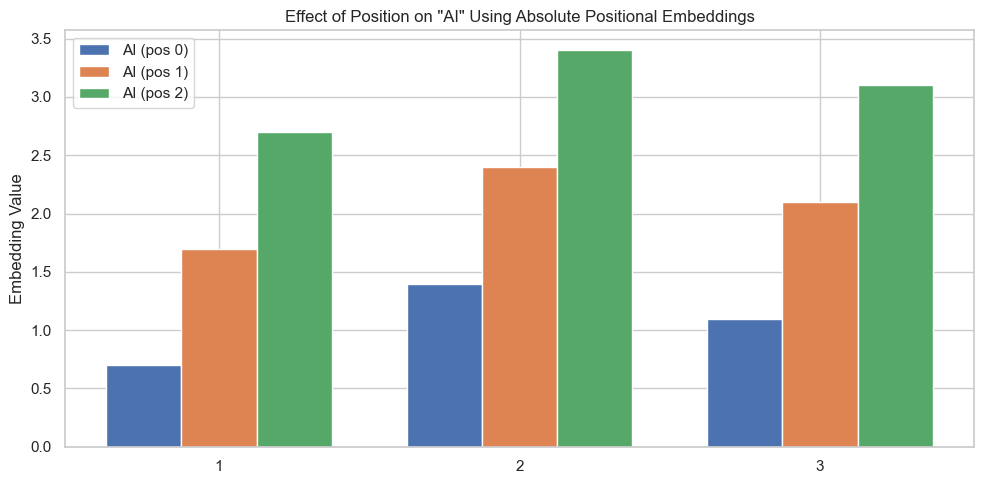

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Fixed word embedding for the same word ("AI")
word = "AI"
word_embedding = np.array([-0.3, 0.4, 0.1])

# Positional embeddings
positional_embeddings = {
    0: np.array([1, 1, 1]),
    1: np.array([2, 2, 2]),
    2: np.array([3, 3, 3])
}

# Final embeddings after adding position
combined = {}
for i in range(3):
    combined[f"{word} (pos {i})"] = word_embedding + positional_embeddings[i]

# Labels for x-axis
labels = ["1", "2", "3"]
x = np.arange(len(labels))
width = 0.25

# Plot
fig, ax = plt.subplots()

for i, (label, values) in enumerate(combined.items()):
    ax.bar(x + i * width, values, width, label=label)

# Axis formatting
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.set_ylabel("Embedding Value")
ax.set_title(f'Effect of Position on "{word}" Using Absolute Positional Embeddings')
ax.legend()
plt.tight_layout()
plt.show()


#### The graph above shows the value of the final embedding for AI depending on its position in the sequence. The x-axis refers to the dimension of the embedding, in this case it is [1, 2, 3], meaning each word embedding is a three-dimensional tensor in this example.

#### You can see how depending on the words position in the sequence, its embedding can be different and this results in different contexts of the w

In [30]:
# Show difference between same word in different positions
print("Embedding of 'AI' + position 0:", word_embeddings["AI"] + positional_embeddings[0])
print("Embedding of 'AI' + position 2:", word_embeddings["AI"] + positional_embeddings[2])

Embedding of 'AI' + position 0: [0.7 1.4 1.1]
Embedding of 'AI' + position 2: [2.7 3.4 3.1]
